# Omicron Sentiment Analysis
>"Showing how sentiment analysis is done."
- toc: true
- badges: true
- comments: true
- image: "images/omi.png"


# About This Analysis

In this time of **Extreme** stuation remaining sane is a victory in itself.People from all over the world are talking about the spread of **Omicron** varient of virus. WHO designated a new variant of the coronavirus, B.1.1.529 as a varient of concern. People from all over the world are talking about this on **twitter** so let's analize the sentiment on that **Tweet**. If you wandering how to analyze the **sentiment** then this post is for you.


# Dataset
We have taken a dataset from kaggle which are collected from **Twitter** when people are talking about this varient.

In [1]:
#Let's Import required module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

In [19]:
#reading csv file
df = pd.read_csv('omicron.csv')
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1465693385088323591,Abaris,Hants,"Would appear on Blogger (did originally), but...",2009-09-16 14:30:32,2880,4369,26907,False,2021-11-30 14:45:08,"@SkyNews ""Told you I'd be Back!"" #OMICRON “Odi...",['OMICRON'],Twitter Web App,0,0,False
1,1465693062999412746,GFTs ,Lalaland,There's a field somewhere beyond all doubt and...,2019-12-28 14:29:13,165,583,21152,False,2021-11-30 14:43:52,Someone told me this in October #Omicron https...,['Omicron'],Twitter for Android,0,0,False
2,1465690116442279942,Herbie Finkle (Cozy),NaN,help me find me frens ❤️,2021-07-10 09:40:57,114,393,2339,False,2021-11-30 14:32:09,Glad to see the public schoolkids are wrapping...,['COVID'],Twitter Web App,0,1,False
3,1465689607165591552,Electrical Review,United Kingdom,Electrical Review is a monthly journal aimed a...,2009-05-21 08:32:19,20759,2321,739,False,2021-11-30 14:30:08,#Automation systems have become increasingly c...,['Automation'],Hootsuite Inc.,0,0,False
4,1465688203709464578,BingX Academy 🔑,NaN,BingX (Prev. Bingbon) is the world's top crypt...,2013-12-31 02:57:32,17134,8,31,False,2021-11-30 14:24:33,"🟢 If u think Omicron is a FUD, you LONG📈\n🔴 If...",NaN,Twitter Web App,2,2,False


In [20]:
#checking the shape of dataset
df.shape

(54168, 16)

In [21]:
#Checking null values
print(df.isnull().sum())

id                      0
user_name               0
user_location       12166
user_description     3211
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            14525
source                  0
retweets                0
favorites               0
is_retweet              0
dtype: int64


Yes there is null value in user_location,user_description and hashtags soremoving all the rows containing null values.

In [22]:
#Dropping the null value since this is huge amount of data so it doesnot affect dataset soo much
df = df.dropna()
df.shape

(29863, 16)

In [23]:
#Again Checking null values
df.isnull().sum()

id                  0
user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
hashtags            0
source              0
retweets            0
favorites           0
is_retweet          0
dtype: int64

Now null value has been cleared

## Cleaning Text Column
Now Lets discuss what's going on here. First we import the required model [re module(regular expression)](https://www.educative.io/edpresso/how-to-use-regex-in-python), [nltk module](https://www.nltk.org/index.html) and [string module](https://docs.python.org/3/library/string.html) then we import the **stopwords** for our purpose. Also we have downloaded stopwords using **nltk** module. By using **clean** function we clean our data.

In [7]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words('english'))

def  clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    return text
df["text"] = df["text"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Here we now look at wordcloud by using **Word cloud object for generating and drawing cloud**. Here a link to learn the function of join function [join](https://www.geeksforgeeks.org/python-pandas-str-join-to-join-string-list-elements-with-passed-delimiter/)

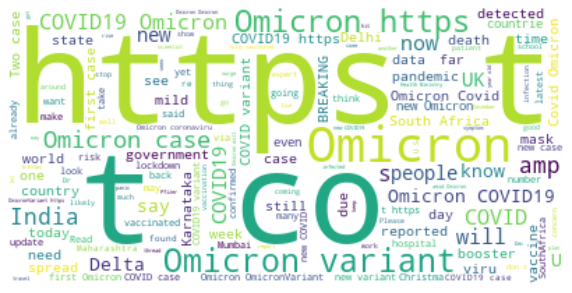

In [28]:
text = " ".join(i for i in df.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

Also let's look at wordcloud of **hashtag**

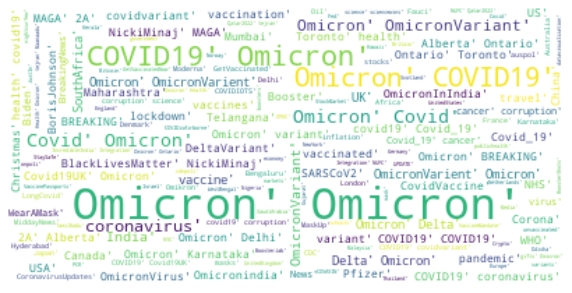

In [29]:
text = " ".join(i for i in df.hashtags)
stopword = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopword,background_color="white").generate(text)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

## Calculating Sentiment Score
What **vader lexicon** do?

VADER ( Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. It is available in the NLTK package and can be applied directly to unlabeled text data.
VADER sentimental analysis relies on a dictionary that maps lexical features to emotion intensities known as sentiment scores. The sentiment score of a text can be obtained by summing up the intensity of each word in the text.
For example- Words like ‘love’, ‘enjoy’, ‘happy’, ‘like’ all convey a positive sentiment. Also VADER is intelligent enough to understand the basic context of these words, such as “did not love” as a negative statement. It also understands the emphasis of capitalization and punctuation, such as “ENJOY” [link about detail](https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664).

What **SentimentIntensityAnalyzer** do?

**Give a sentiment intensity score to sentences.**

What **polarity_score** do?

Return a float for sentiment strength based on the input text.
Positive values are positive valence, negative value are negative
valence.

In [31]:
#Calculating Sentiment scores
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["text"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["text"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["text"]]
df = df[["text", "Positive", "Negative", "Neutral"]]
print(df.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                text  Positive  Negative  \
0  @SkyNews "Told you I'd be Back!" #OMICRON “Odi...       0.0     0.103   
1  Someone told me this in October #Omicron https...       0.0     0.000   
3  #Automation systems have become increasingly c...       0.0     0.000   
5  #Digitaldisruption and emerging technologies a...       0.0     0.000   
7  Fatigue, head and body aches and occasional so...       0.0     0.289   

   Neutral  
0    0.897  
1    1.000  
3    1.000  
5    1.000  
7    0.711  


### Summing all Positive, Negative and Neutral Sentiment Score

In [13]:
x = sum(df["Positive"])
y = sum(df["Negative"])
z = sum(df["Neutral"])

Now let's see what actually is the sentiment in that **Tweet**

In [14]:
def sentiment_score(a,b,c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
        
sentiment_score(x,y,z)

Neutral 🙂 


Did you shocked ?? I am because in the adverse situation like this people are not sharing positive or negative tweet.All the Tweet are Neutral which means people are sharing information rather than opinion.

# Summary

So hurray we have come to the end and in this way you can analyze the sentiments of the Omicron variant of coronavirus. It’s a new variant of coronavirus that has been designated as the variant of concern by the **WHO**. I hope you liked this article on Omicron sentiment analysis. Feel free to ask your valuable questions in the comments section below.



